In [1]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
#from xarray import open_mfadataset
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
#from pathlib import Path4
#edit 12/04
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
#try adding
#import cfunits
from pyschism.mesh import Hgrid
import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection


print("Modules imported!")


Modules imported!


In [2]:
#import Sienna's plotting library
import schism_plot_lib_2025_10_06 as spl
import time

In [3]:
dpi = 300
image_save_dpi = 1200

import matplotlib_inline
%matplotlib inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
matplotlib.rcParams["figure.dpi"] = dpi
plt.rcParams['figure.dpi'] = dpi

In [4]:
fn = "/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/outputs/"
run = spl.SchismOutput(output_folder=fn)


 Creating run object for results in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/outputs/ ... 

Found 3562 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - zCoordinates


In [5]:
#time of interest is Timestamp('2020-10-22 21:15:00'), 42 days and 21 hours
fno=44
tpoint=9

In [6]:
ds = run.Result(run, variable = "salinity", filenumber=fno)

/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/outputs/salinity_44.nc
Loading in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/outputs/salinity_44.nc


/home/jisrael/miniconda/envs/geoplot/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Loaded in dataset! 

<xarray.Dataset> Size: 2GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 469033, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) datetime64[ns] 384B 2020-10-22T16:30:00 ... 2020-10-23T1...
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 2GB ...
TIME ['2020-10-22T16:30:00.000000000' '2020-10-22T17:00:00.000000000'
 '2020-10-22T17:30:00.000000000' '2020-10-22T18:00:00.000000000'
 '2020-10-22T18:30:00.000000000' '2020-10-22T19:00:00.000000000'
 '2020-10-22T19:30:00.000000000' '2020-10-22T20:00:00.000000000'
 '2020-10-22T20:30:00.000000000' '2020-10-22T21:00:00.000000000'
 '2020-10-22T21:30:00.000000000' '2020-10-22T22:00:00.000000000'
 '2020-10-22T22:30:00.000000000' '2020-10-22T23:00:00.000000000'
 '2020-10-22T23:30:00.000000000' '2020-10-23T00:00:00.000000000'
 '2020-10-23T00:30:00.000000000' '2020-10-23T01:00:00.000000000'
 '2020-10-23T01:30:00

In [7]:
proj_utm10 = 'EPSG:26910'

In [8]:
run.run_dir
run.run_dir / "hgrid.gr3"

PosixPath('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/hgrid.gr3')

In [9]:
hgrid = Hgrid.open('/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_13/hgrid_clean.gr3', crs=proj_utm10)

In [10]:
# fig1, ax1 = ds.plot_variable(run, domain="Bay-Delta", time="average", depth= "average", titlestr="Historical Salinity 07/06/2018")

In [11]:
#subtract the historical from the event removed
fn2 = "/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_14/outputs"
run2 = spl.SchismOutput(output_folder=fn2)
dtemp2 = run2.Result(run2, variable = "salinity", filenumber=fno)


 Creating run object for results in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_14/outputs ... 

Found 3562 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - zCoordinates
/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_14/outputs/salinity_44.nc
Loading in /expanse/lustre/scratch/jisrael/temp_project/run_schism/run_14/outputs/salinity_44.nc
Loaded in dataset! 

<xarray.Dataset> Size: 2GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 469033, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) datetime64[ns] 384B 2020-10-22T16:30:00 ... 2020-10-23T1...
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 2GB ...
TIME ['2020-10-22T16:30:00.000000000' '2020-10-22T17:00:00.000000000'
 '2020-10-22T17:30:00.000000000' '2020-10-22T18:00:00.000000000'
 '2020-10-22T18:30:00.000000000' 

In [12]:
sal1_diff=dtemp2.dataset-ds.dataset

In [13]:
print(sal1_diff.max())
print(sal1_diff.min())

<xarray.Dataset> Size: 4B
Dimensions:   ()
Data variables:
    salinity  float32 4B 5.843
<xarray.Dataset> Size: 4B
Dimensions:   ()
Data variables:
    salinity  float32 4B -4.374


In [14]:
dtemp2.dataset=sal1_diff

In [15]:
#fig2, ax2 = dtemp2.plot_variable(run, domain="Delta", time=tpoint,depth= "average",titlestr="Event removed - Histoical Salinity")

Taking slice at time  ... 
Model is at time = Oct 22 2020, 21:00
Taking depth average ... 
Loaded in hgrid.gr3 file...

Domain = East_Delta
/home/jisrael/Savio_scratch_back_up/Plotting/event_removal


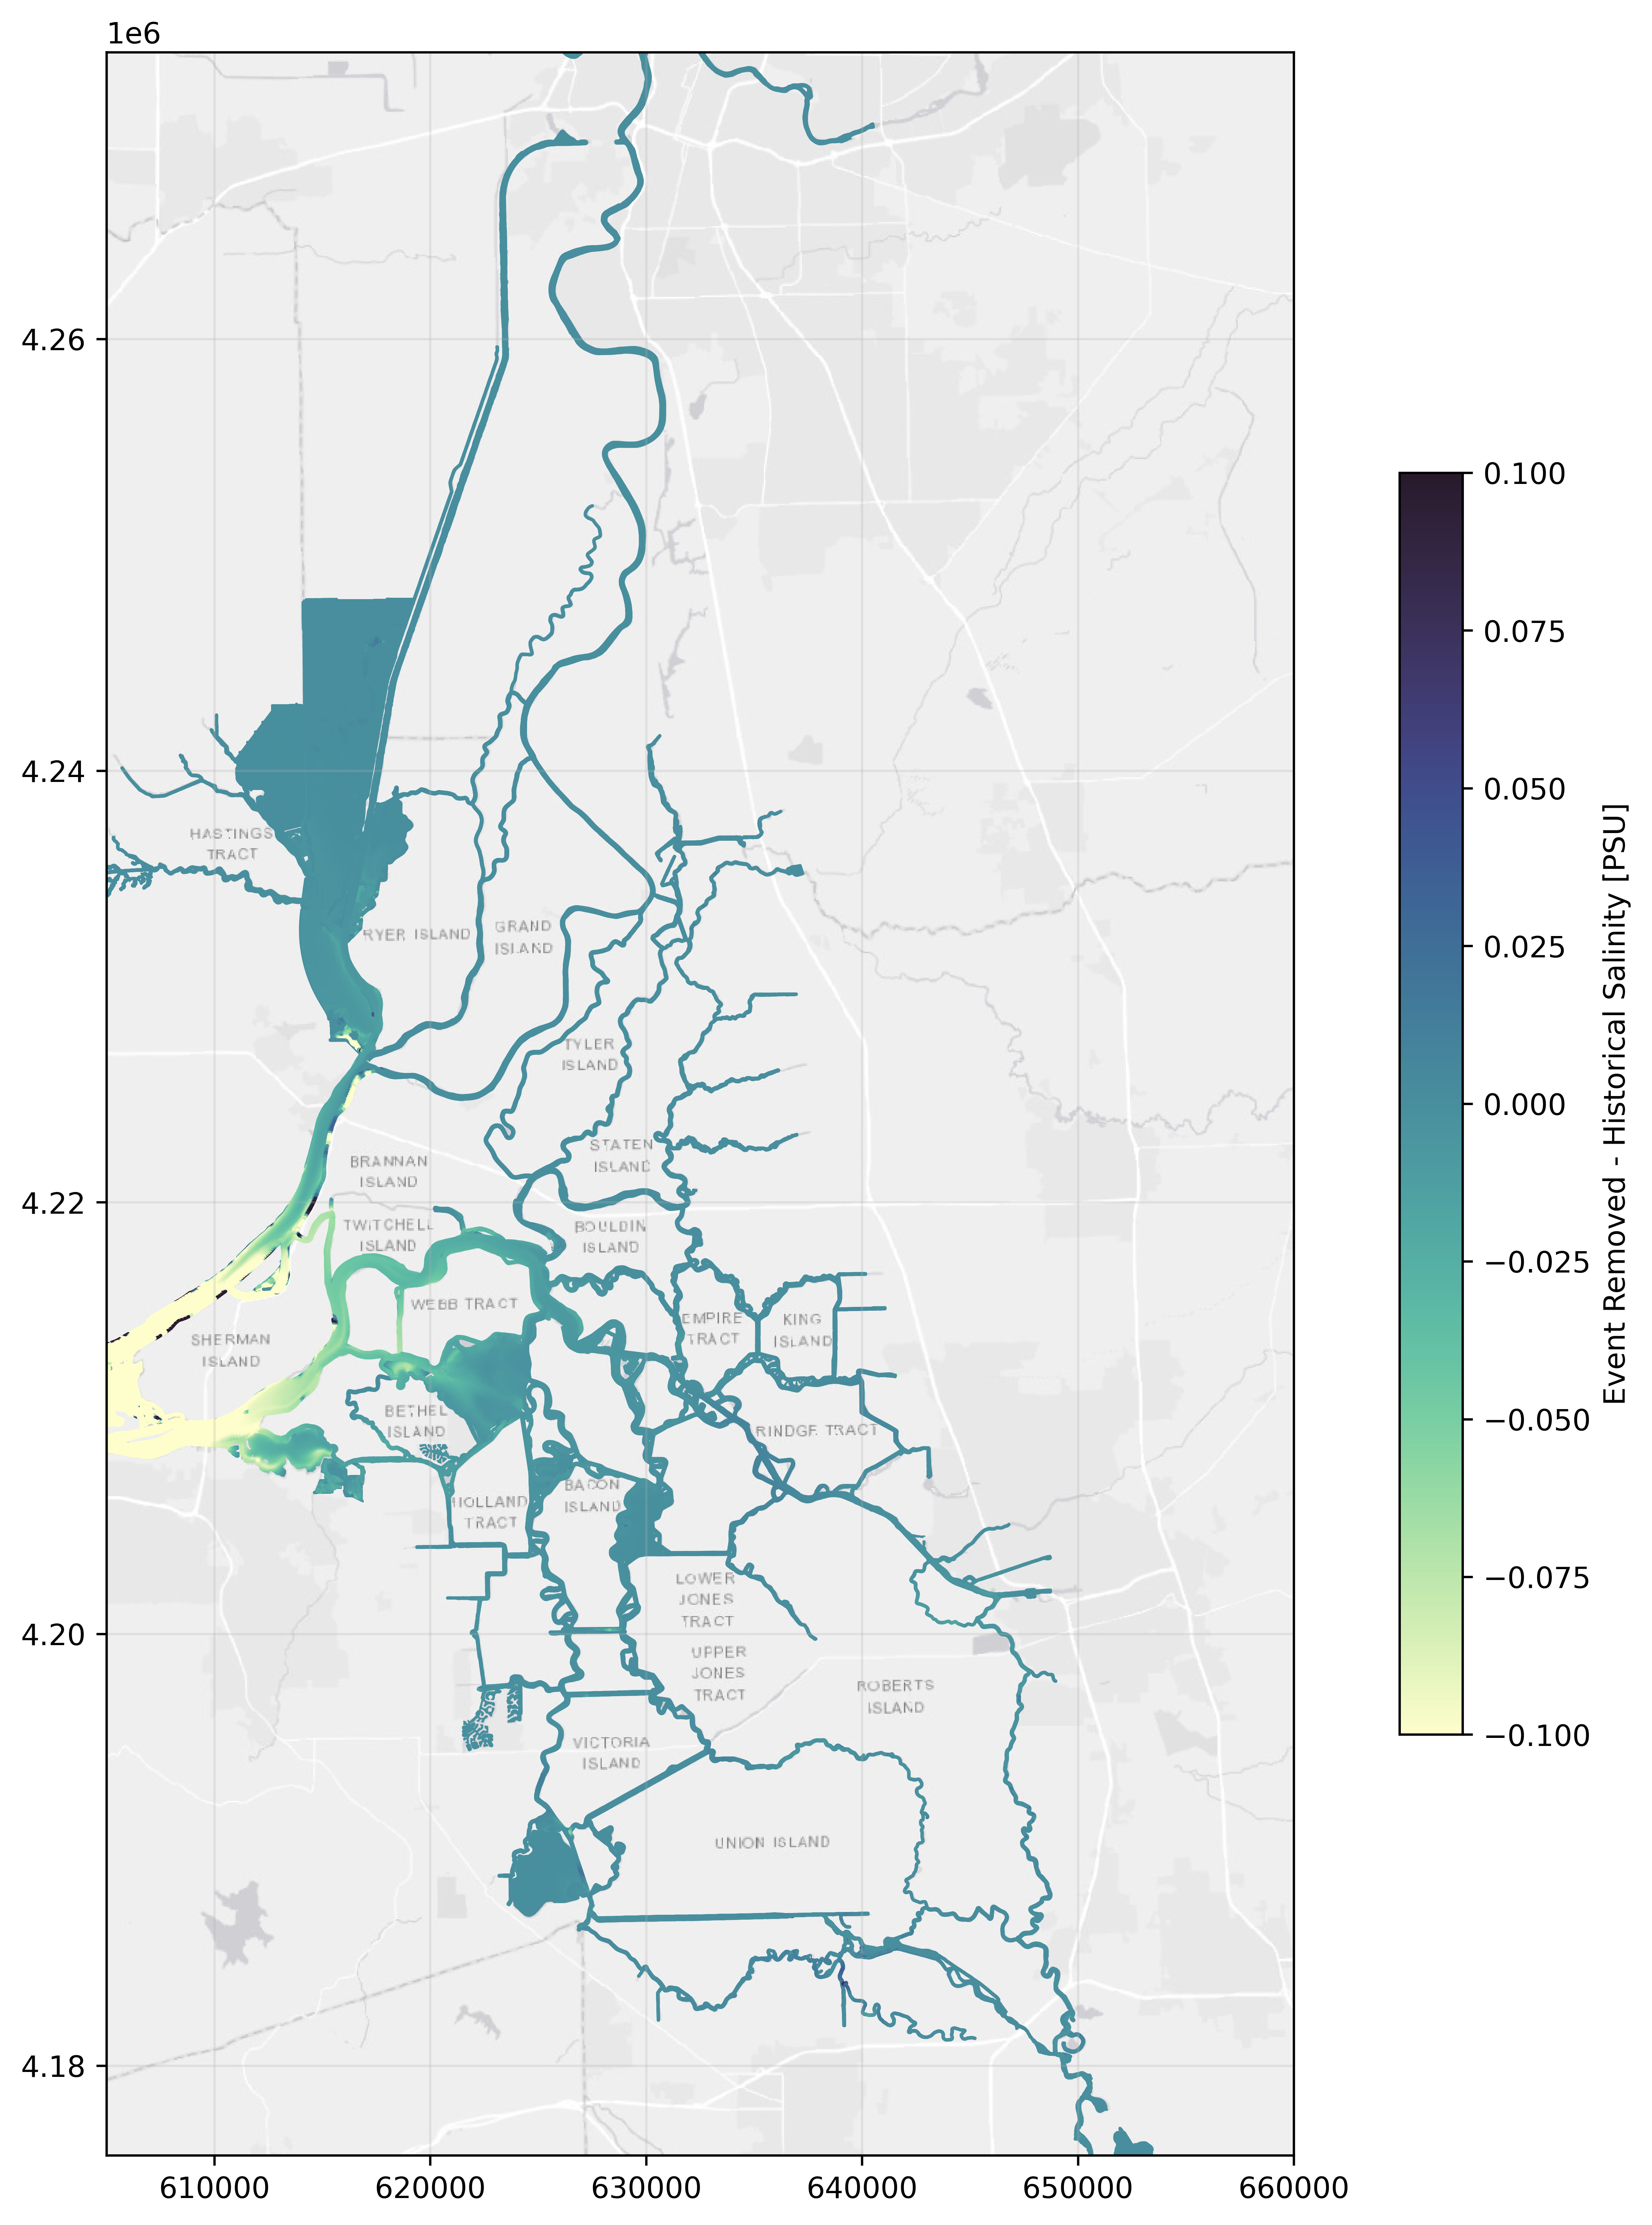

In [16]:
fig3, ax3 = dtemp2.plot_variable(run, domain="East_Delta", time=tpoint,depth= "average",titlestr="Event removed - Histoical Salinity")



In [17]:
# Can we make a percent chnag 

In [18]:
# fig2.climits[

Taking slice at time  ... 
Model is at time = Oct 22 2020, 21:00
Taking depth average ... 
Domain = Bay-Delta
Domain options: SSC, Delta, South_Delta, Bay_Delta
/home/jisrael/Savio_scratch_back_up/Plotting/event_removal


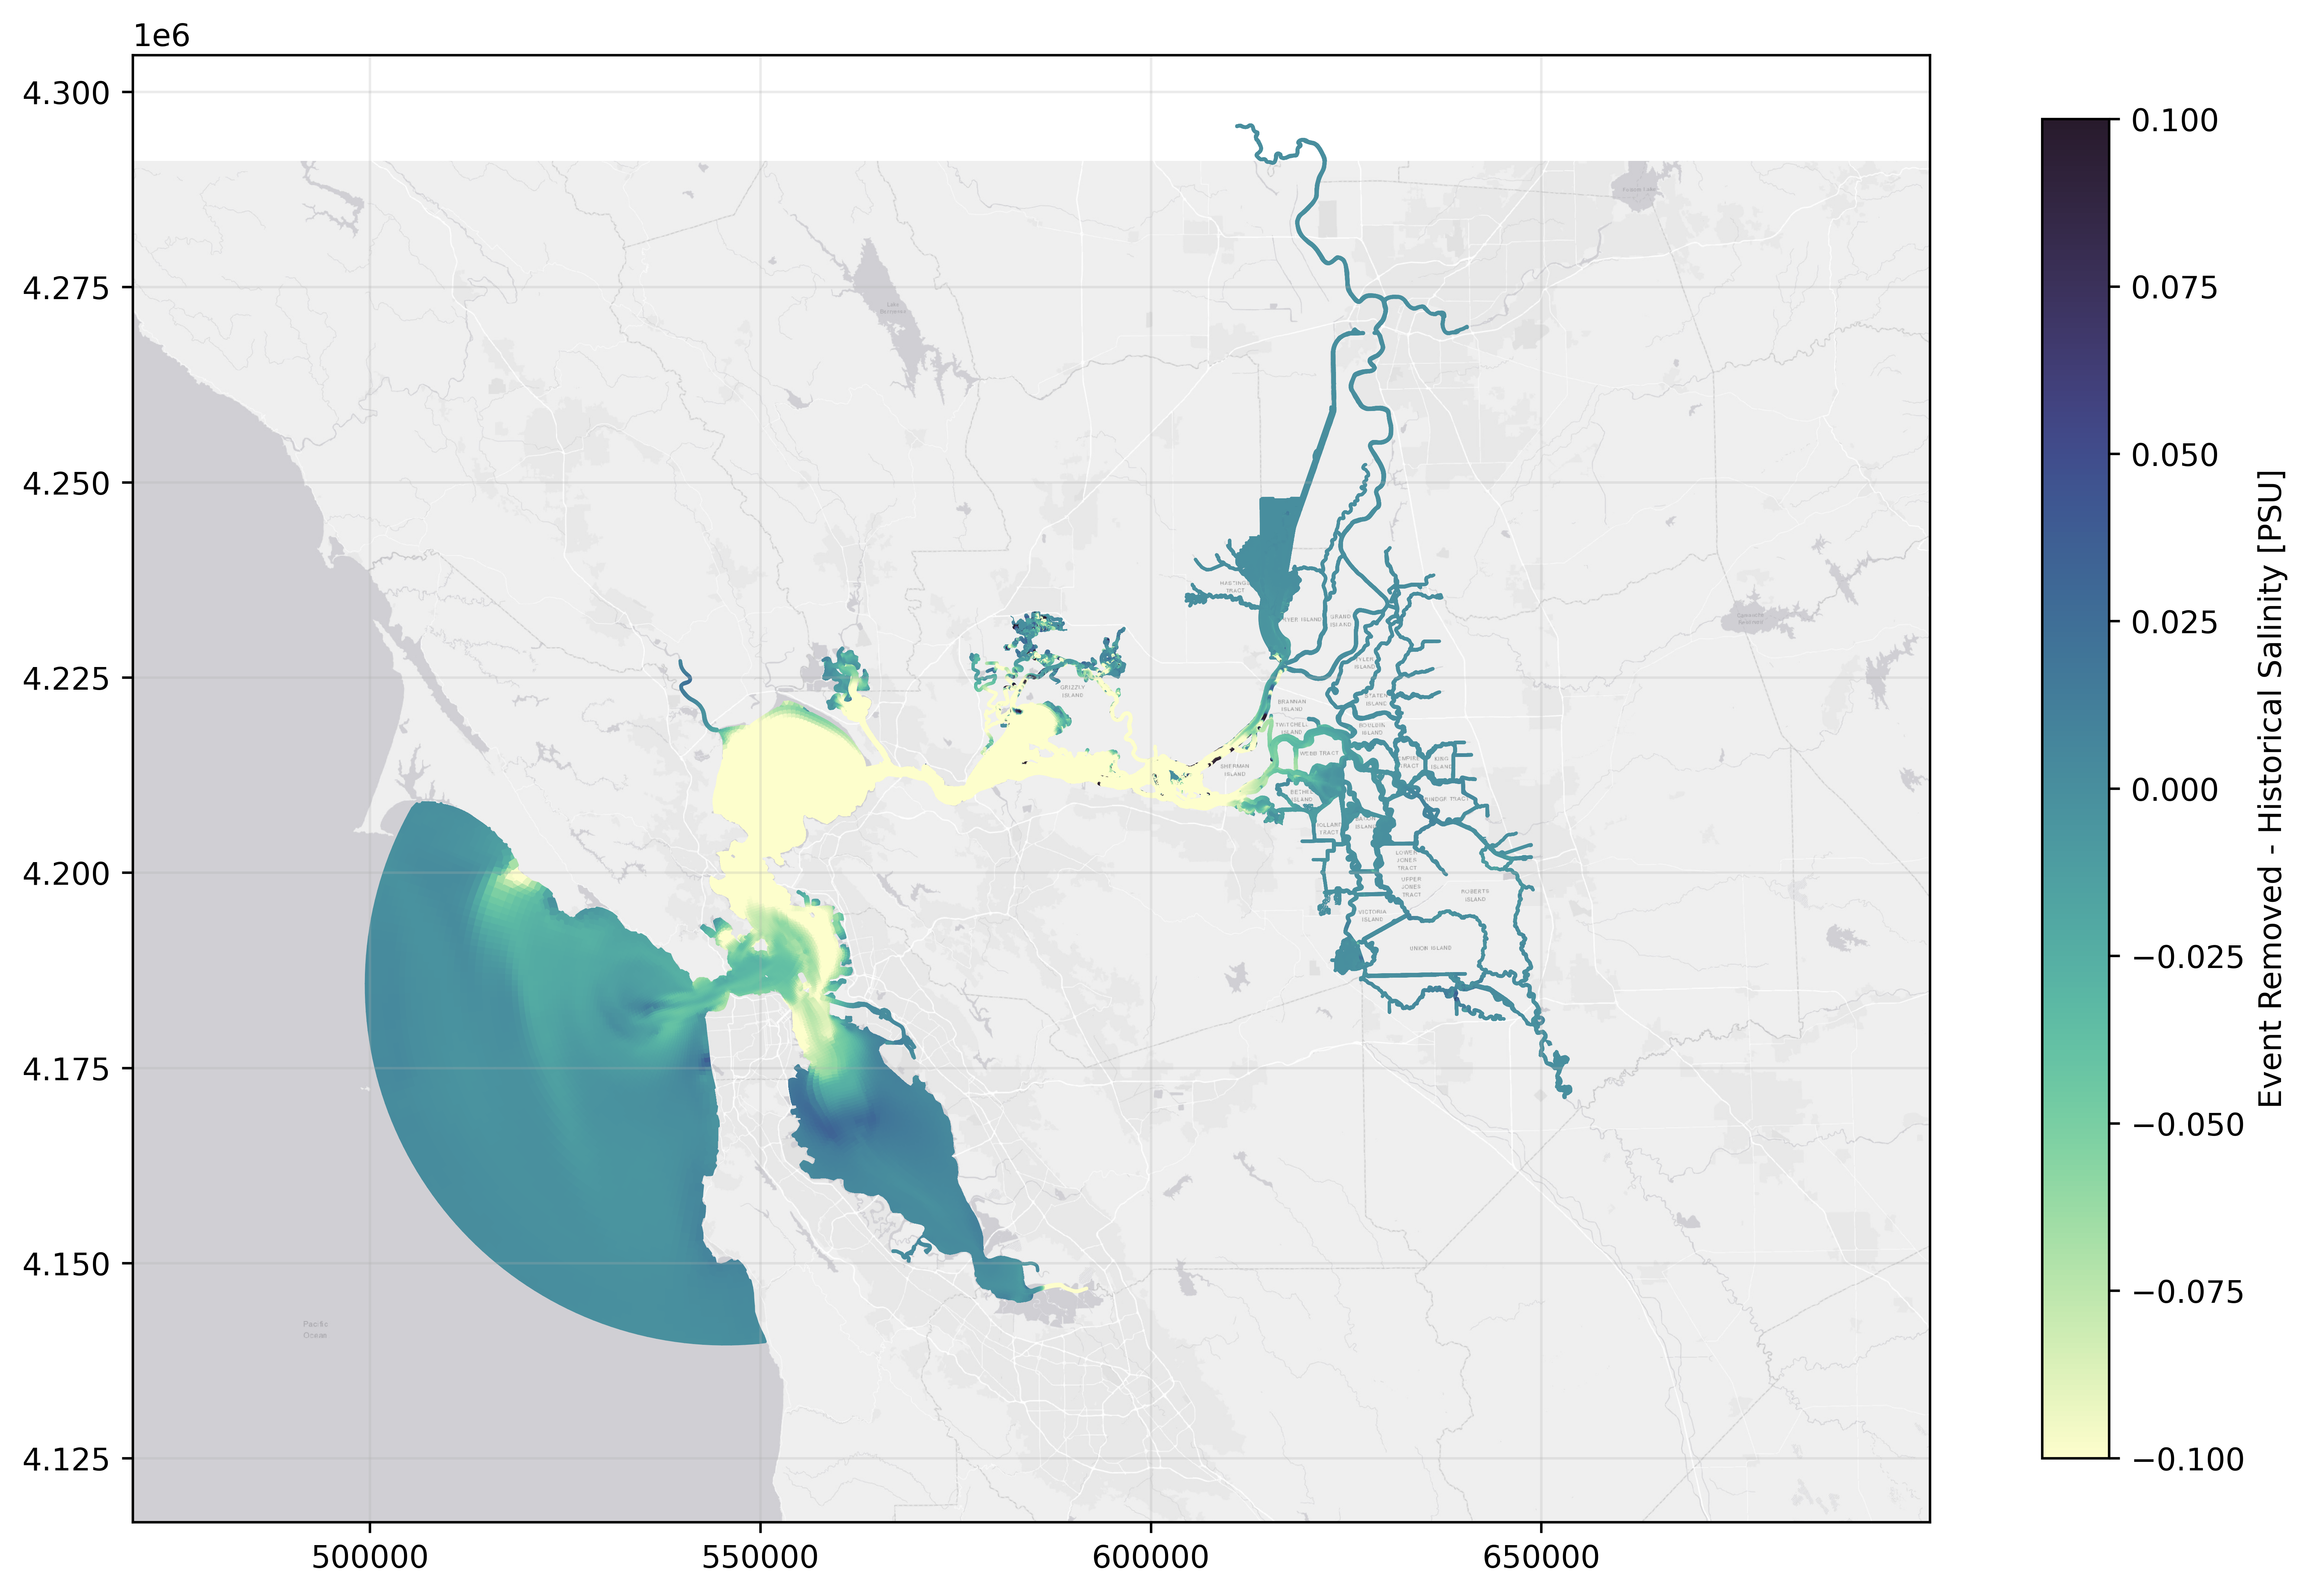

In [19]:
fig2, ax2 = dtemp2.plot_variable(run, domain="Bay-Delta", time=tpoint,depth= "average",titlestr="Event removed - Histoical Salinity")



In [20]:
# fig2, ax2 = dtemp2.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr="20% decrease in exports - Histoical Salinity 08/06/2018")

In [21]:
# fig3, ax3 = dtemp2.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr="20% decrease in exports - Histoical Salinity 08/06/2018")

In [22]:
# #subtract the historical from the 2C warming
# fn3 = "/expanse/lustre/scratch/jisrael/temp_project/run_schism/run_4/outputs"
# run3 = spl.SchismOutput(output_folder=fn3)
# dtemp3 = run3.Result(run3, variable = "salinity", filenumber=fno)
# sal2_diff=dtemp3.dataset-ds.dataset
# dtemp3.dataset=sal2_diff

In [23]:
# fig4, ax4 = dtemp3.plot_variable(run, domain="Delta", time=tpoint,depth= "average",titlestr="20% increase in Sac flow - Historical Salinity 08/06/2018")



In [24]:
# fig5, ax5 = dtemp3.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr="20% increase in Sac flow - Historical Salinity 08/06/2018")


In [25]:
# sal3_diff=dtemp3.dataset-dtemp2.dataset #increased inflows minus decreased exports
# dtemp3.dataset=sal3_diff

In [26]:
# fig6, ax6 = dtemp3.plot_variable(run, domain="Delta", time=tpoint,depth= "average",titlestr="20% increase in Sac flow - 20% decrease in exports")

